K_Means Clustering


     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
57           58    Male   69                  44                      46
95           96    Male   24                  60                      52
160         161  Female   56                  79                      35
26           27  Female   45                  28                      32
96           97  Female   47                  60                      47


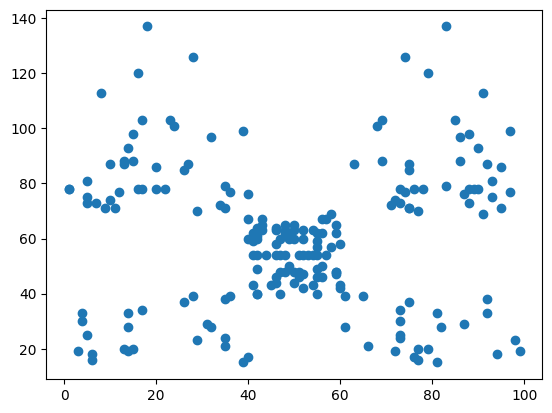

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Mall_Customers.csv')
print(df.sample(5))
# Drop the 'CustomerID' column as it is not needed for clustering
df = df.drop(columns=['CustomerID'])

# Visualize the data
plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'])

Text(0.5, 1.0, 'Elbow Method for Optimal K')

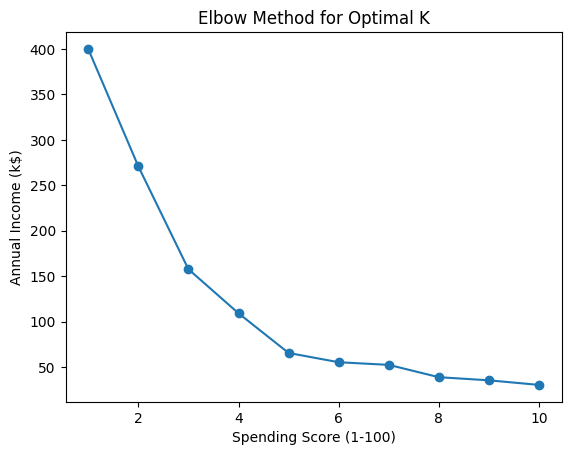

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scale the data
standard = StandardScaler()
df_scaled = standard.fit_transform(df[['Spending Score (1-100)', 'Annual Income (k$)']])

# Elbow Method to find the optimal number of clusters
k_val = range(1, 11)
error = []
for k in k_val:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    inertia = kmeans.inertia_
    error.append(inertia)

# Plotting the Elbow Method
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.plot(k_val, error, marker='o') 
plt.title('Elbow Method for Optimal K')

Silhouette Score: 0.5546571631111091


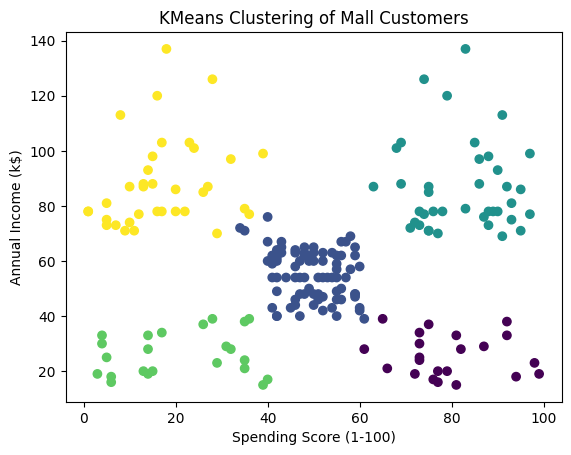

In [ ]:
from sklearn.metrics import silhouette_score

# Apply KMeans with 5 clusters
kmeans = KMeans(n_clusters =5)
kmeans_pred = kmeans.fit_predict(df_scaled)
silhouette_avg = silhouette_score(df_scaled, kmeans_pred)
print(f'Silhouette Score: {silhouette_avg}')

# Visualize the clusters
plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'], c=kmeans_pred, cmap='viridis')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.title('KMeans Clustering of Mall Customers')
plt.show()

Hierarchical Clustering

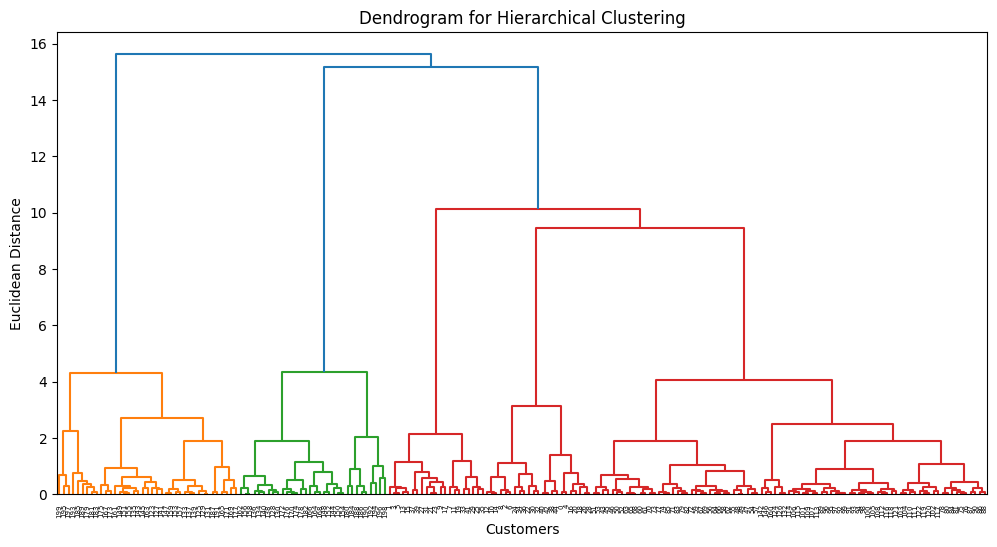

In [61]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering



# Plot Dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(12, 6))
linked = linkage(df_scaled, method='ward')
dendrogram(linked)              # to find the best number of clusters you can look for the longest vertical line and then draw a horizontal line across it
                                # then count how many vertical lines it intersects --- > this will give you the number of best clusters
plt.title('Dendrogram for Hierarchical Clustering') 
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

Silhouette Score: 0.5538089226688662


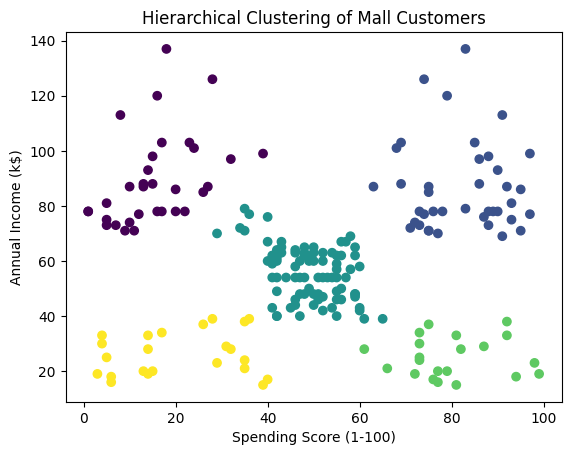

In [ ]:
from sklearn.metrics import silhouette_score

# Apply Agglomerative Clustering with 5 clusters
hc = AgglomerativeClustering(n_clusters=5)
hc_pred = hc.fit_predict(df_scaled)

# Calculate silhouette score
silhouette_avg = silhouette_score(df_scaled, hc_pred)
print(f'Silhouette Score: {silhouette_avg}')

# Visualize the clusters
plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'], c=hc_pred, cmap='viridis')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.title('Hierarchical Clustering of Mall Customers')
plt.show()